In [2]:
from GraphModels.model import *
from GraphModels.solvers import *
from GraphModels.metrics import *
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import multiprocessing as mp
import cProfile, pstats
from pstats import SortKey

In [14]:

densities = [0.94, 0.87, 0.85, 0.77, 0.74, 0.68, 0.64, 0.55, 0.4]
mht_algos = ['SI', 'B', 'H', 'BH', 'BY']
metrics = [FP, FN, TPR, FDR, F1]
data = {d: {al: [0 for _ in metrics] for al in mht_algos} for d in densities}
S_exp = 100
S_obs = 10

for density in densities:
    for exp in range(S_exp):
        model = CholRandomModel(20, density, corr_model_builder)
        for _ in range(S_obs):
            samples = model.sample(40)
            slv = MHTSolver(0.05, corr_pvalues, np.corrcoef)
            slv.fit(samples)
            for corr in mht_algos:
                ms = model.apply_metrics(nx.from_numpy_array(slv.apply_correction(corr)), metrics)
                for idx in range(len(ms)):
                    data[density][corr][idx] += ms[idx]
                    
        for corr in mht_algos:
            for idx in range(len(metrics)):
                data[density][corr][idx] /= S_obs
                
    for corr in mht_algos:        
        for idx in range(len(metrics)):
            data[density][corr][idx] /= S_exp

100%|██████████| 9/9 [01:38<00:00, 10.93s/it]


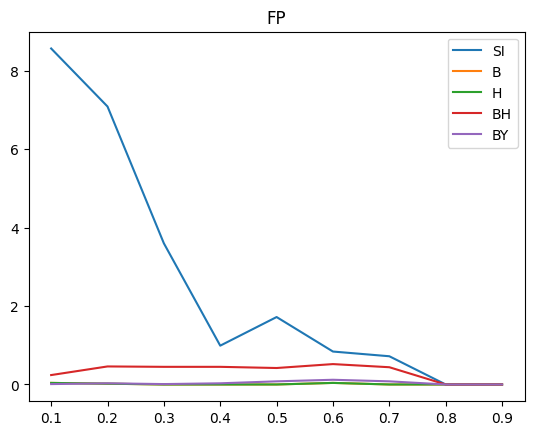

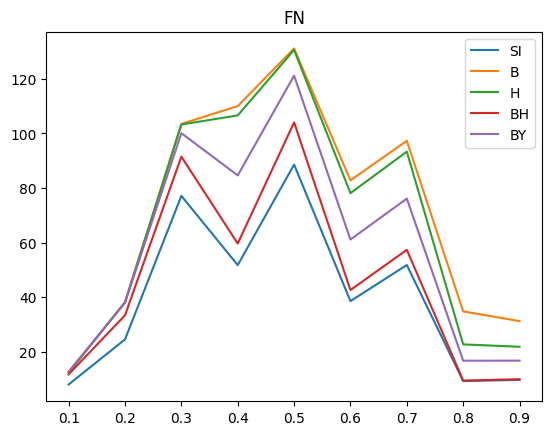

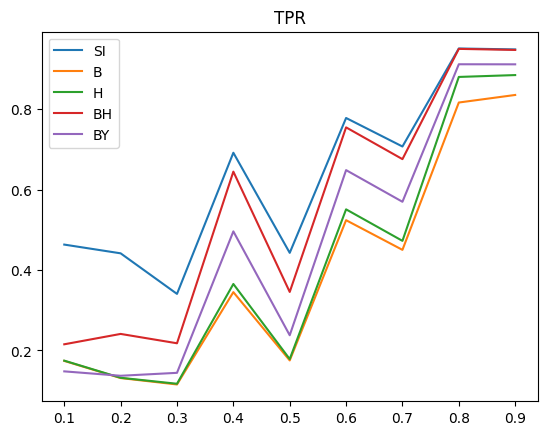

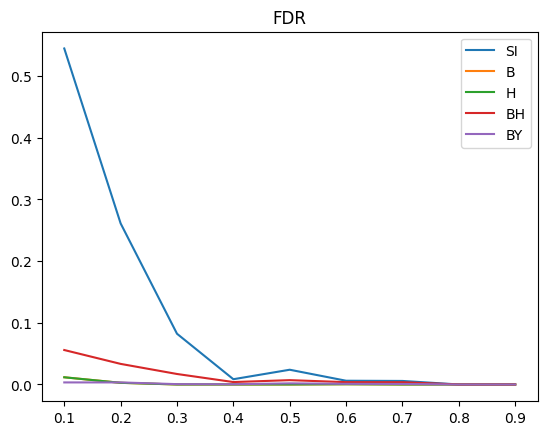

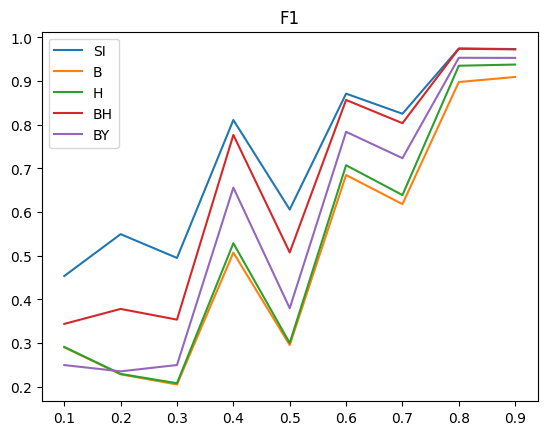

<Figure size 640x480 with 0 Axes>

In [16]:
for m in range(len(metrics)):
    for al in mht_algos:
        x = np.arange(0.1, 1, 0.1)
        y = np.zeros_like(x)
        
        for d in range(len(densities)):
            y[d] = data[densities[d]][al][m]
        
        plt.plot(x, y, label=al)
    
    plt.legend()
    plt.title(metrics[m].__name__)
    plt.show()
    plt.clf()